In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HoltWinters
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

#### Ques 18.9 (a)

In [15]:
shipment_df = pd.read_csv(r"E:\Michaelmas\BU7155-Business Data Mining\Homework\DMBA-R-datasets\DMBA-R-datasets\ApplianceShipments.csv")

In [16]:
# Convert Quarter column to datetime format (e.g., 'Q1-1985' to proper dates)
shipment_df['Quarter'] = (shipment_df['Quarter']).astype(str)

# Map quarters to months
quarter_to_month = {
    'Q1': '01',  # January
    'Q2': '04',  # April
    'Q3': '07',  # July
    'Q4': '10'   # October
}

# Convert 'Quarter' to datetime
shipment_df['Quarter'] = shipment_df['Quarter'].apply(
    lambda x: pd.to_datetime(x.split('-')[1] + '-' + quarter_to_month[x.split('-')[0]])
)

In [4]:
shipment_df.head()

,Quarter,Shipments
0,1985-01-01,4009
1,1985-04-01,4321
2,1985-07-01,4224
3,1985-10-01,3944
4,1986-01-01,4123


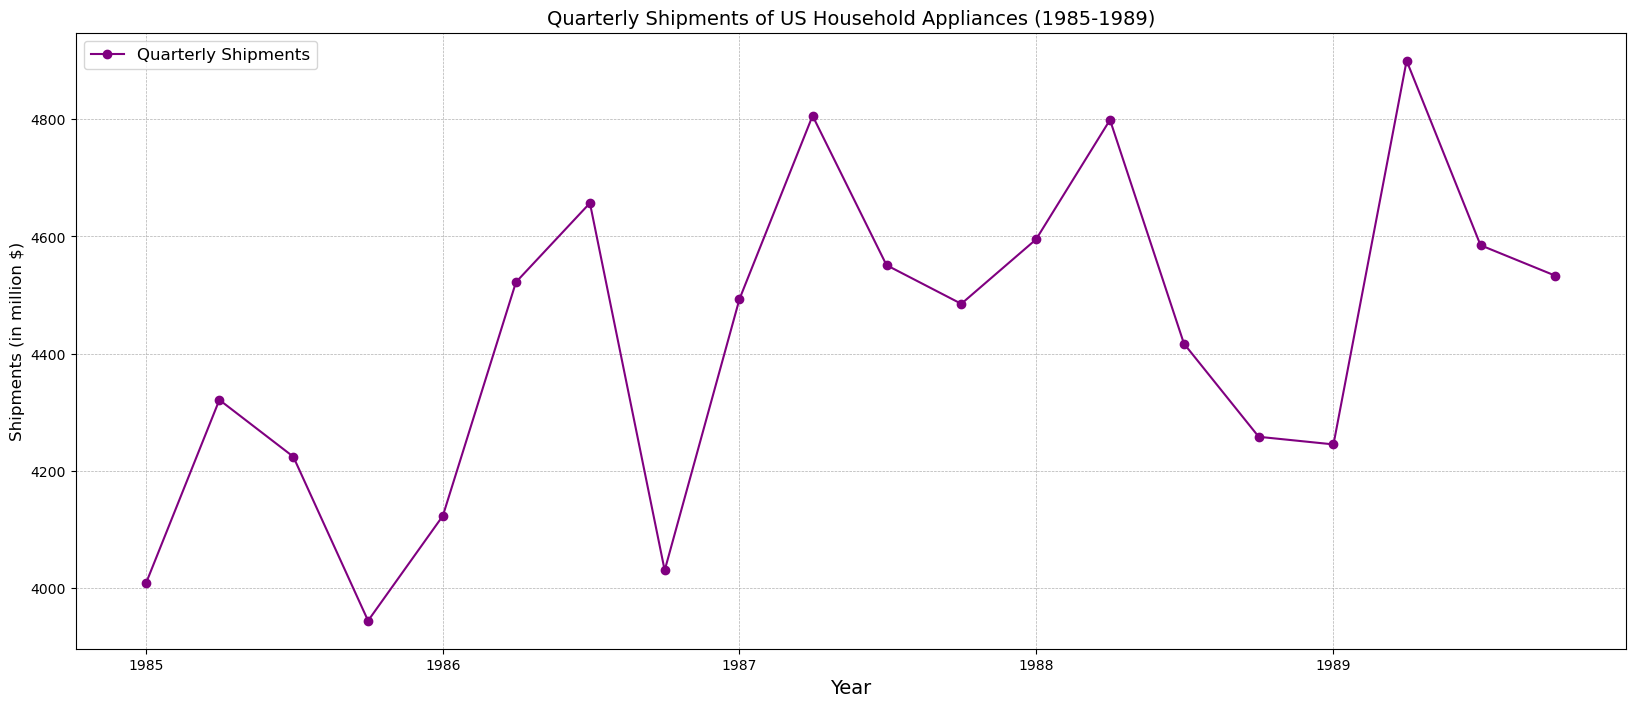

In [5]:
# Plotting the time series
plt.figure(figsize=(20, 8))
plt.plot(shipment_df['Quarter'], shipment_df['Shipments'], marker='o', linestyle='-', label='Quarterly Shipments', color= 'purple')
plt.title('Quarterly Shipments of US Household Appliances (1985-1989)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Shipments (in million $)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.show()

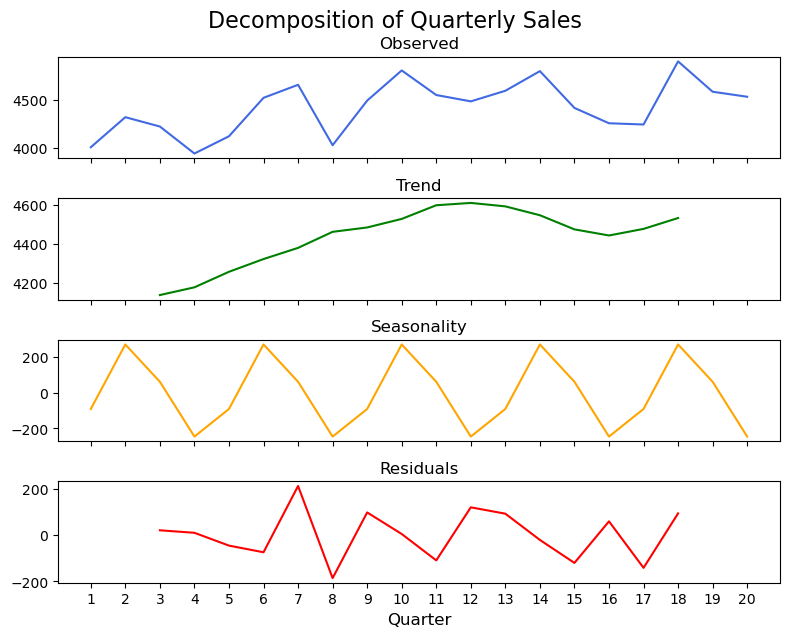

In [6]:
# Perform decomposition
decomposition = seasonal_decompose(shipment_df['Shipments'], model='additive', period=4)

# Plot the decomposition components
fig, axes = plt.subplots(4, 1, figsize=(8, 6), sharex=True)

# Plot each component with appropriate labels
axes[0].plot(decomposition.observed, label='Observed', color ='royalblue')
axes[0].set_title('Observed')

axes[1].plot(decomposition.trend, label='Trend', color='green')
axes[1].set_title('Trend')

axes[2].plot(decomposition.seasonal, label='Seasonality', color='orange')
axes[2].set_title('Seasonality')

axes[3].plot(decomposition.resid, label='Residuals', color='red')
axes[3].set_title('Residuals')

# x-axis has whole numbers for quarters
plt.xticks(ticks=range(len(shipment_df['Shipments'])), labels=range(1, len(shipment_df['Shipments']) + 1))
plt.tight_layout()
plt.xlabel('Quarter', fontsize=12)
plt.suptitle('Decomposition of Quarterly Sales', fontsize=16, y=1.02)
plt.show()

In [7]:
# Level
average_level = decomposition.observed.mean()
average_level

4424.85

In [8]:
# Extract residuals from the decomposition
residuals = decomposition.resid

# Calculate the mean of the residuals (noise)
residual_mean = residuals.mean()

# Display the result
print(f"The mean of the residuals (noise) is: {residual_mean}")

The mean of the residuals (noise) is: 2.3515625


C:\Users\Arushi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Arushi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Arushi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


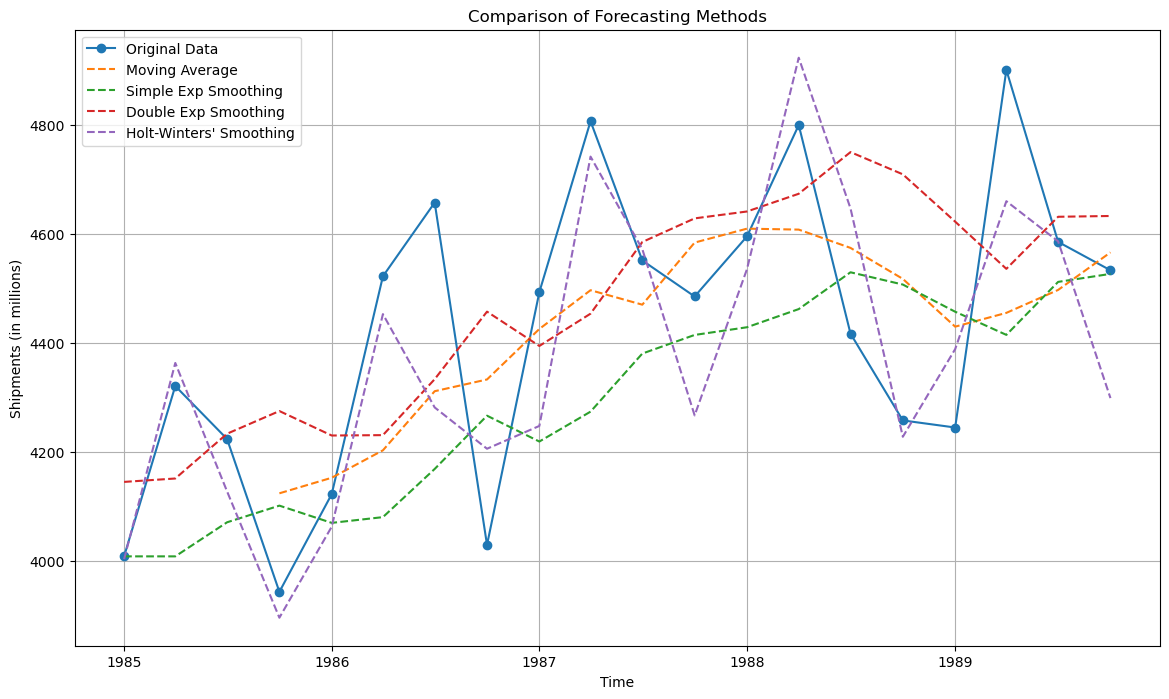

In [9]:
shipment_df.set_index('Quarter', inplace=True)

# Moving Average
shipment_df['Moving_Avg'] = shipment_df['Shipments'].rolling(window=4).mean()

# Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(shipment_df['Shipments']).fit(smoothing_level=0.2, optimized=False)
shipment_df['SES'] = ses_model.fittedvalues

# Double Exponential Smoothing (Holt’s)
des_model = ExponentialSmoothing(shipment_df['Shipments'], trend="add").fit(optimized=True)
shipment_df['DES'] = des_model.fittedvalues

# Holt-Winter’s Exponential Smoothing
hw_model = HoltWinters(shipment_df['Shipments'], seasonal='add', seasonal_periods=4).fit()
shipment_df['Holt_Winters'] = hw_model.fittedvalues

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(shipment_df['Shipments'], label='Original Data', marker='o')
plt.plot(shipment_df['Moving_Avg'], label='Moving Average', linestyle='--')
plt.plot(shipment_df['SES'], label='Simple Exp Smoothing', linestyle='--')
plt.plot(shipment_df['DES'], label='Double Exp Smoothing', linestyle='--')
plt.plot(shipment_df['Holt_Winters'], label="Holt-Winters' Smoothing", linestyle='--')

plt.title('Comparison of Forecasting Methods')
plt.xlabel('Time')
plt.ylabel('Shipments (in millions)')
plt.legend()
plt.grid(True)
plt.show()

#### Ques 18.9 (b)

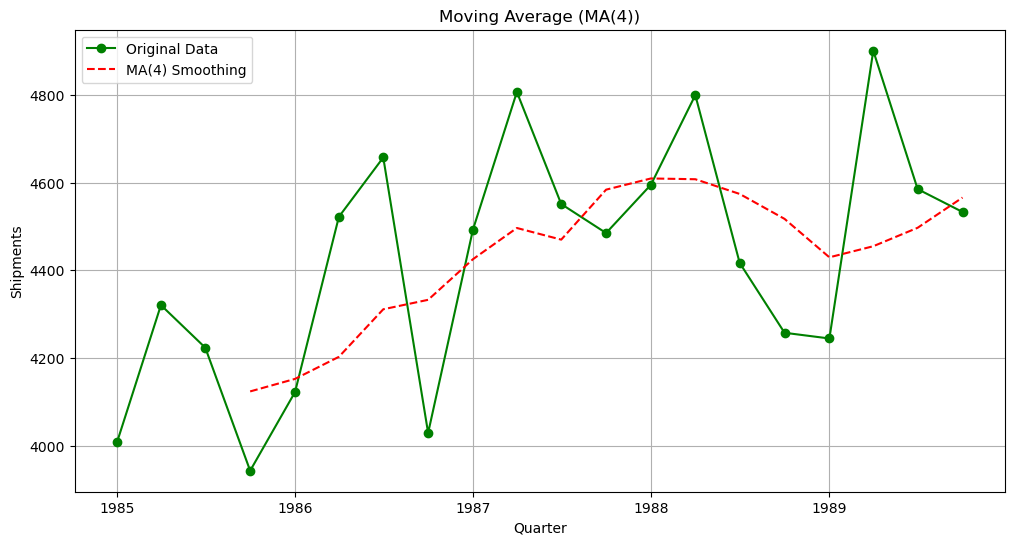

In [10]:
# Apply Moving Average (MA(4))
shipment_df["MA_4"] = shipment_df["Shipments"].rolling(window=4).mean()

# Plot the Moving Average Chart
plt.figure(figsize=(12, 6))
plt.plot(shipment_df["Shipments"], label="Original Data", marker="o", color ='green')
plt.plot(shipment_df["MA_4"], label="MA(4) Smoothing", linestyle="--", color="red")
plt.title("Moving Average (MA(4))")
plt.xlabel("Quarter")
plt.ylabel("Shipments")
plt.legend()
plt.grid()
plt.show()

In [11]:
# Apply Moving Average (MA(4))
shipment_df["MA_4"] = shipment_df["Shipments"].rolling(window=4).mean()

# Forecast for Q1-1990 using the last 4 values from the training data (up to Q4-1989)
q1_1990_forecast = shipment_df["Shipments"][-4:].mean()

# Print the forecast
print(f"Forecast for Q1-1990 using MA(4): {q1_1990_forecast}")

Forecast for Q1-1990 using MA(4): 4565.75


In [12]:
# Forecast for Q1-1991 using Q1-1990 forecast
new_data = shipment_df['Shipments'][-3:].tolist() + [q1_1990_forecast]
q1_1991_forecast = sum(new_data[-4:]) / 4

# Print the forecast
print(f"Forecast for Q1-1991 using MA(4): {q1_1991_forecast}")

Forecast for Q1-1991 using MA(4): 4645.9375


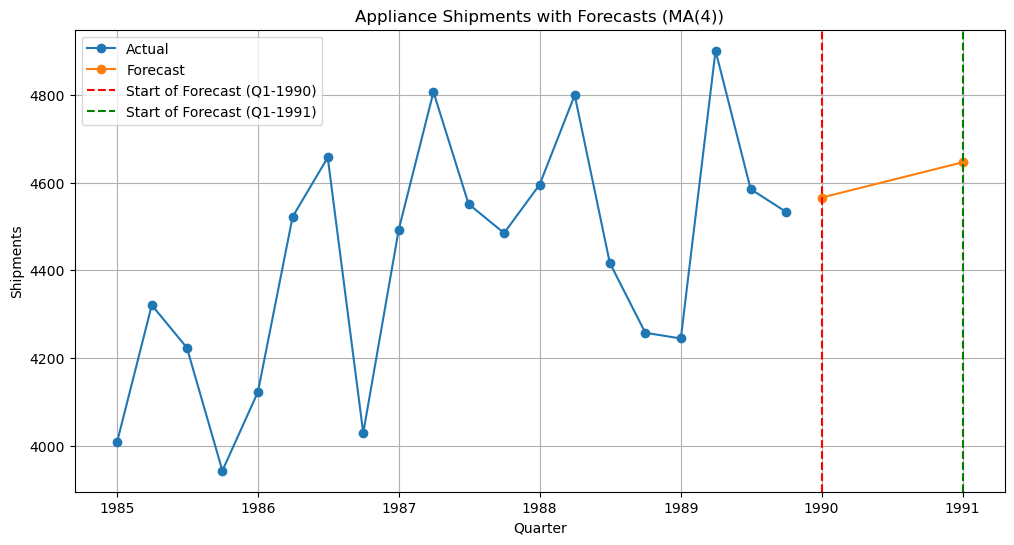

In [20]:
# Add forecast data to the dataset for visualization
forecast_data = pd.DataFrame({
    'Quarter': [pd.to_datetime('1990-01-01'), pd.to_datetime('1991-01-01')],
    'Shipments': [q1_1990_forecast, q1_1991_forecast],
    'Type': ['Forecast', 'Forecast']
})

# Add a column to distinguish actual and forecasted data
shipment_df['Type'] = 'Actual'

# Combine actual and forecasted data
combined_data = pd.concat([
    shipment_df[['Quarter', 'Shipments', 'Type']],
    forecast_data[['Quarter', 'Shipments', 'Type']]
])

# Plot the data
plt.figure(figsize=(12, 6))
for label, group in combined_data.groupby('Type'):
    plt.plot(group['Quarter'], group['Shipments'], marker='o', label=label)

# Highlight forecasted periods with vertical lines
plt.axvline(x=pd.to_datetime('1990-01-01'), color='red', linestyle='--', label='Start of Forecast (Q1-1990)')
plt.axvline(x=pd.to_datetime('1991-01-01'), color='green', linestyle='--', label='Start of Forecast (Q1-1991)')

# Add titles, labels, and legend
plt.title('Appliance Shipments with Forecasts (MA(4))')
plt.xlabel('Quarter')
plt.ylabel('Shipments')
plt.legend()
plt.grid(True)
plt.show()

#### Ques 18.9 (c)

MAPE for Regression Model: 0.0411


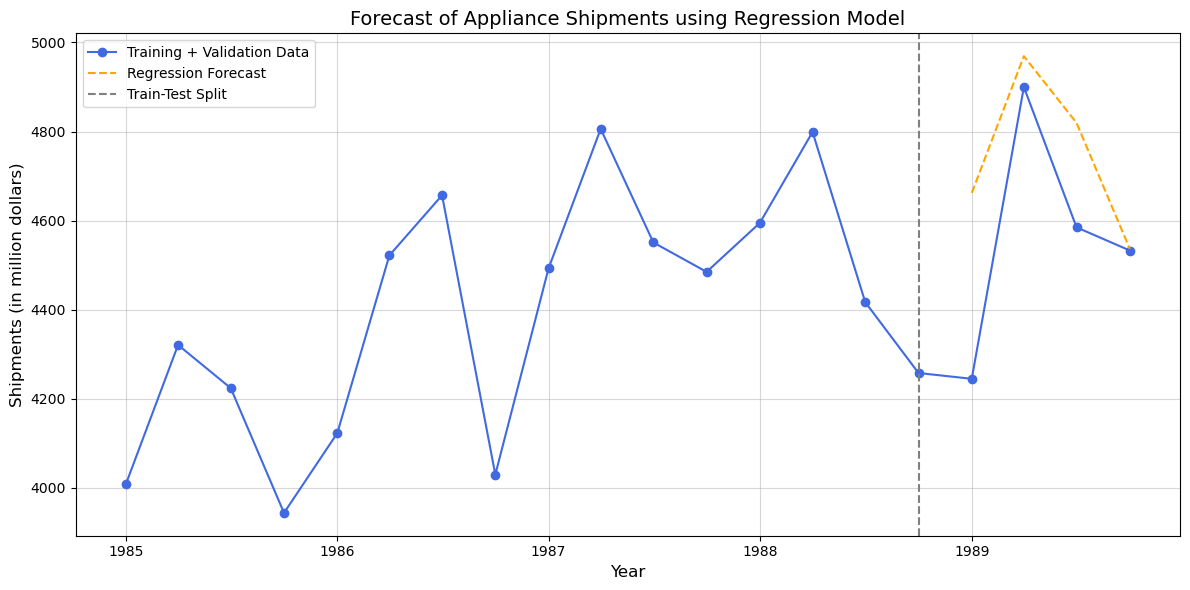

In [17]:
# i. Using the Regression model

# --- Data Preparation ---
# Split into training and validation sets
train_data = shipment_df.iloc[:-4].copy()  # Training set (all but last year)
validation_data = shipment_df.iloc[-4:].copy()  # Validation set (last 4 quarters)

# Add trend and seasonality features to training data
train_data['Trend'] = np.arange(len(train_data)) + 1
train_data['Quarter_Seasonality'] = train_data['Quarter'].dt.quarter  # Extract quarter from datetime
train_data = pd.get_dummies(train_data, columns=['Quarter_Seasonality'], drop_first=True)

# Prepare features and target for training
X_train = train_data[['Trend', 'Quarter_Seasonality_2', 'Quarter_Seasonality_3', 'Quarter_Seasonality_4']]
y_train = train_data['Shipments']

# --- Model Training ---
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Add trend and seasonality features to validation data
validation_data['Trend'] = np.arange(len(train_data), len(train_data) + len(validation_data)) + 1
validation_data['Quarter_Seasonality'] = validation_data['Quarter'].dt.quarter  # Extract quarter from datetime
validation_data = pd.get_dummies(validation_data, columns=['Quarter_Seasonality'], drop_first=True)

# Prepare features and target for validation
X_valid = validation_data[['Trend', 'Quarter_Seasonality_2', 'Quarter_Seasonality_3', 'Quarter_Seasonality_4']]
y_valid = validation_data['Shipments']

# --- Forecasting ---
reg_predictions = reg_model.predict(X_valid)
reg_mape = mean_absolute_percentage_error(y_valid, reg_predictions)

# Output the MAPE
print(f"MAPE for Regression Model: {reg_mape:.4f}")

# Plotting with Year on the X-axis
plt.figure(figsize=(12, 6))

# Combine training and validation data for plotting
combined_data = pd.concat([train_data, validation_data])
combined_data['Regression_Forecast'] = np.concatenate([np.full(len(train_data), np.nan), reg_predictions])

# Plot actual data (training + validation)
plt.plot(
    combined_data['Quarter'], 
    combined_data['Shipments'], 
    label='Training + Validation Data', 
    color='royalblue', 
    marker='o'
)

# Plot regression forecast
plt.plot(
    validation_data['Quarter'], 
    reg_predictions, 
    label="Regression Forecast", 
    linestyle="--", 
    color="orange"
)

# Add a vertical line at the train-test split
plt.axvline(x=train_data['Quarter'].iloc[-1], color='gray', linestyle='--', label='Train-Test Split')

# Format x-axis for years
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())

# Add labels, title, legend, and grid
plt.title("Forecast of Appliance Shipments using Regression Model", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Shipments (in million dollars)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()

MAPE for Holt-Winter's Exponential Smoothing: 0.0330


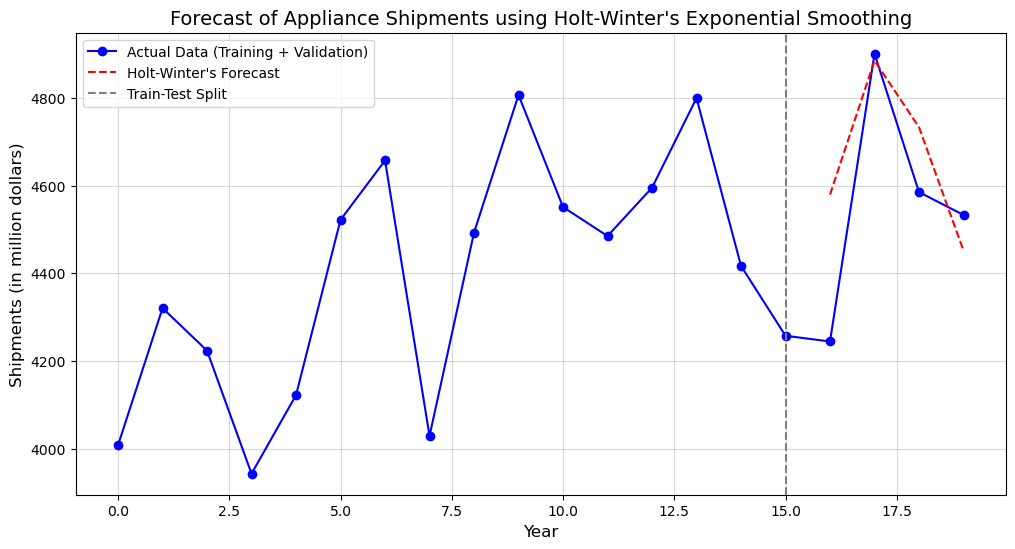

In [18]:
# ii. Using Holt-Winter's Exponential Smoothing 

# Fit Holt-Winter's model on training data with additive trend and seasonality
hw_model = ExponentialSmoothing(
    train_data['Shipments'], trend='add', seasonal='add', seasonal_periods=4
).fit()

# Forecast for the validation period (4 steps ahead)
hw_forecast = hw_model.forecast(steps=4)

# Compute MAPE for the validation set using Holt-Winter's forecasts
hw_mape = mean_absolute_percentage_error(validation_data['Shipments'], hw_forecast)

# Output the MAPE
print(f"MAPE for Holt-Winter's Exponential Smoothing: {hw_mape:.4f}")

# Combine training and validation data for smooth plotting (actual data only)
combined_actual_data = pd.concat([train_data['Shipments'], validation_data['Shipments']])

# Use Holt-Winter's forecast only for the validation period
hw_forecast_validation = pd.Series(hw_forecast, index=validation_data.index)

# --- Plotting Holt-Winter's Forecast (Validation Only) ---
plt.figure(figsize=(12, 6))

# Plot combined actual data (Training + Validation)
plt.plot(combined_actual_data.index, combined_actual_data, label='Actual Data (Training + Validation)', color='blue', marker='o')

# Plot Holt-Winter's forecast for validation only
plt.plot(hw_forecast_validation.index, hw_forecast_validation.values, label="Holt-Winter's Forecast", linestyle="--", color="red")

# Add a vertical line for the train-test split
plt.axvline(x=train_data.index[-1], color='gray', linestyle='--', label='Train-Test Split')

# Add titles and labels
plt.title("Forecast of Appliance Shipments using Holt-Winter's Exponential Smoothing", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Shipments (in million dollars)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)

# Show the plot
plt.show()

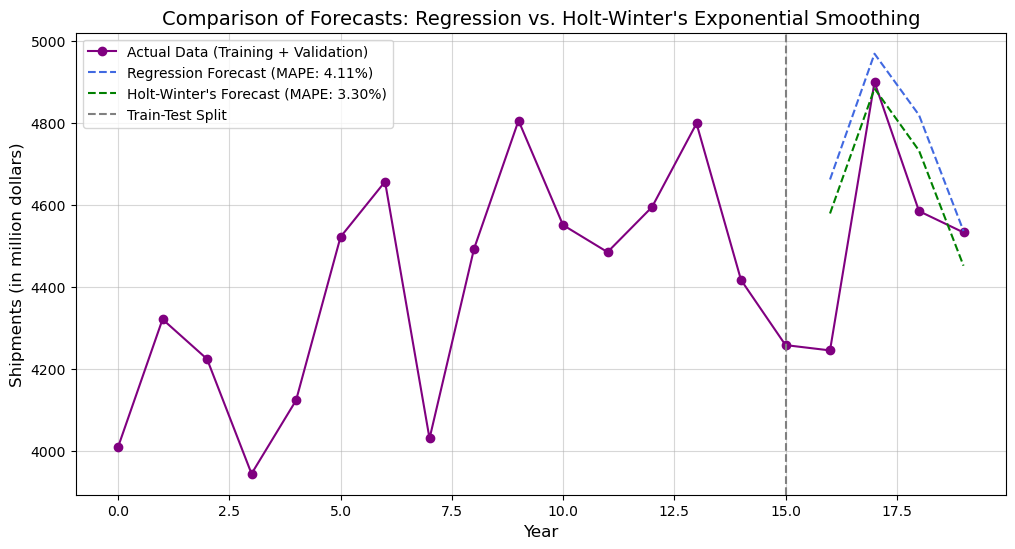

In [19]:
# iii. Which model would you prefer to use for forecasting Q1-1990? Give three reasons

# Combine training and validation data for smooth plotting (actual data only)
combined_actual_data = pd.concat([train_data['Shipments'], validation_data['Shipments']])

# Use Holt-Winter's forecast only for the validation period
hw_forecast_validation = pd.Series(hw_forecast, index=validation_data.index)

# Predict validation data using the regression model (already computed)
reg_forecast_validation = pd.Series(reg_predictions, index=validation_data.index)

# --- Plotting Both Models with MAPE ---

plt.figure(figsize=(12, 6))

# Plot actual data (Training + Validation)
plt.plot(combined_actual_data.index, combined_actual_data, label='Actual Data (Training + Validation)', color='purple', marker='o')

# Plot regression forecast for validation
plt.plot(reg_forecast_validation.index, reg_forecast_validation.values, label=f"Regression Forecast (MAPE: {reg_mape:.2%})", linestyle="--", color="royalblue")

# Plot Holt-Winter's forecast for validation
plt.plot(hw_forecast_validation.index, hw_forecast_validation.values, label=f"Holt-Winter's Forecast (MAPE: {hw_mape:.2%})", linestyle="--", color="green")

# Add a vertical line for the train-test split
plt.axvline(x=train_data.index[-1], color='gray', linestyle='--', label='Train-Test Split')

# Add titles and labels
plt.title("Comparison of Forecasts: Regression vs. Holt-Winter's Exponential Smoothing", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Shipments (in million dollars)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)

# Show the plot
plt.show()
